<a href="https://colab.research.google.com/github/ANDOOR/DataVizFall2020_Colab/blob/master/Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(db)


# Explore data

In [4]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [5]:
df.nunique

<bound method DataFrame.nunique of               date      county       state     fips  cases  deaths
0       2020-01-21   Snohomish  Washington  53061.0      1       0
1       2020-01-22   Snohomish  Washington  53061.0      1       0
2       2020-01-23   Snohomish  Washington  53061.0      1       0
3       2020-01-24        Cook    Illinois  17031.0      1       0
4       2020-01-24   Snohomish  Washington  53061.0      1       0
...            ...         ...         ...      ...    ...     ...
521529  2020-09-10  Sweetwater     Wyoming  56037.0    319       2
521530  2020-09-10       Teton     Wyoming  56039.0    453       1
521531  2020-09-10       Uinta     Wyoming  56041.0    310       2
521532  2020-09-10    Washakie     Wyoming  56043.0    110       6
521533  2020-09-10      Weston     Wyoming  56045.0     21       0

[521534 rows x 6 columns]>

In [6]:
df_bristol = df[(df['county']=='Bristol') & (df['state']=='Massachusetts')]['fips'].unique()[0]
df_bristol




25005.0

In [7]:
df_suffolk = df[(df['county']=='Suffolk') & (df['state']=='Massachusetts')]['fips'].unique()[0]
df_suffolk

25025.0

In [8]:
print("Bristol_fips =",df_bristol)
print("Suffolk_fips =",df_suffolk)

Bristol_fips = 25005.0
Suffolk_fips = 25025.0


In [9]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
#print("Bristol_fips",df_bristol)

In [10]:
df1 = df.set_index('date')
df1

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...
2020-09-10,Sweetwater,Wyoming,56037.0,319,2
2020-09-10,Teton,Wyoming,56039.0,453,1
2020-09-10,Uinta,Wyoming,56041.0,310,2


In [11]:
#df1 = df[df['fips']==fips][['date','county','state','cases','deaths']]

In [35]:
def get_county_stat(df, fips):
  #df1 = df[['date','county','state','cases','deaths']](df['fips']==fips)
  
  df1 = df[df['fips']==fips][['date','county','state','cases','deaths']].copy()
  df1.set_index('date', inplace=True)
  df1.index = pd.to_datetime(df1.index)
  return df1





get_county_stat(df,df_bristol).head()

,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0


## Explore data type

In [36]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)


Text(0.5, 1.0, 'Deaths Comparison')

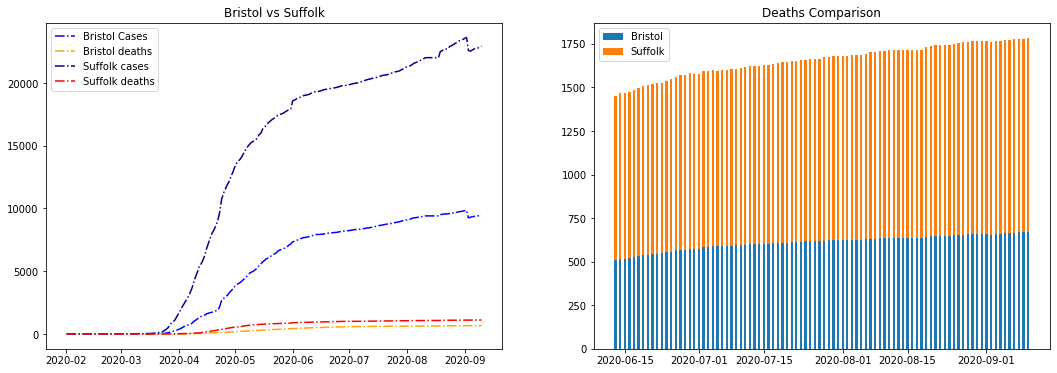

In [44]:
f,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(df_Bristol.index,df_Bristol.cases,c='b',ls='-.',label='Bristol Cases',fillstyle='none')
#ax[0].plot(df_Bristol.index,df_Bristol.cases,'-.',color='steelblue',label='Bristol cases')
ax[0].plot(df_Bristol.index,df_Bristol.deaths,c='orange',ls='-.',label='Bristol deaths',fillstyle='none')
ax[0].plot(df_Suffolk.index,df_Suffolk.cases,c='darkblue',ls='-.',label='Suffolk cases',fillstyle='none')
ax[0].plot(df_Suffolk.index,df_Suffolk.deaths,c='red',ls='-.',label='Suffolk deaths',fillstyle='none')
ax[0].legend()
ax[0].set_title('Bristol vs Suffolk')

barWidth = 0.5
past = -90
ax[1].bar(df_Bristol.index[past:],df_Bristol.deaths[past:], width=barWidth, label = 'Bristol')
ax[1].bar(df_Suffolk.index[past:],df_Suffolk.deaths[past:], width=barWidth, label = 'Suffolk', bottom=df_Bristol.deaths[past:])
ax[1].legend()
ax[1].set_title('Deaths Comparison')


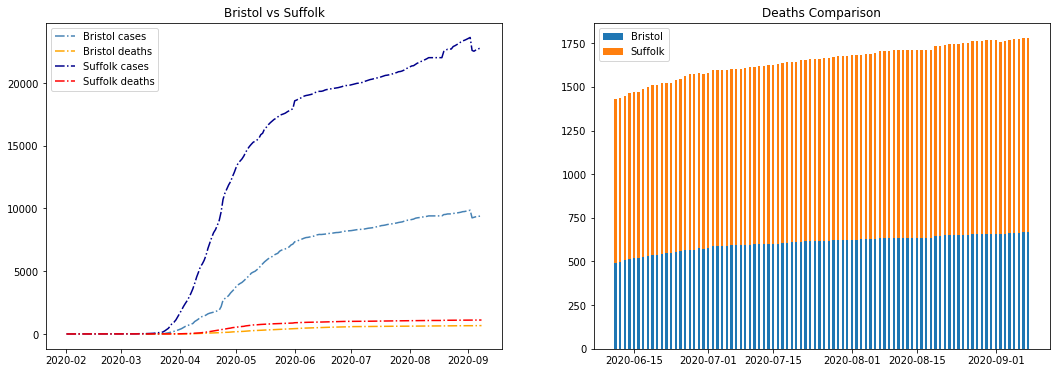

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,6))
ADD CODE HERE - (4)


## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





## Death rate Per FIPS 

## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)